In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import pearsonr
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [2]:
all_pair = pd.read_csv("../data/allPair.csv",low_memory=False)
universities = pd.read_csv("../data/university.csv")
state = 'CA'

def state_df(df, state):
    return df[df['state'] == state]

state_pair = state_df(all_pair, state)
state_univ = state_df(universities, state)

In [3]:
def home_count_to_univ(df):
    '''
    find the number of homes to the nearest university, grouped by university
    '''
    state_grouped = df.groupby('UniversityName')
    home_count = state_grouped.size()
    home_count.sort_values(inplace=True,ascending=False)
    home_count_df = pd.DataFrame({"UniversityName":home_count.index, "homeCount":home_count.values})
    return state_grouped, home_count_df

In [4]:
def distcorr_univ(pair, max_dist):
    '''
    find the saleprice-distance correlation for each university, and append it as a column in home_count_to_university
    '''
    pair = pair[pair['distance']<max_dist]
    state_grouped_by_univ, home_count_to_university = home_count_to_univ(pair)
    univNames = home_count_to_university['UniversityName'].tolist()
    home_count_to_university['distCorr'] = np.nan

    for i in range(len(univNames)):
        univ = home_count_to_university.loc[home_count_to_university.index[i], 'UniversityName']
        df = state_grouped_by_univ.get_group(univ)
        corr = df.corr()
        home_count_to_university.loc[home_count_to_university.index[i], 'distCorr'] = corr['saleprice']['distance']

    return home_count_to_university


In [5]:
fullDF = distcorr_univ(state_pair, 10)

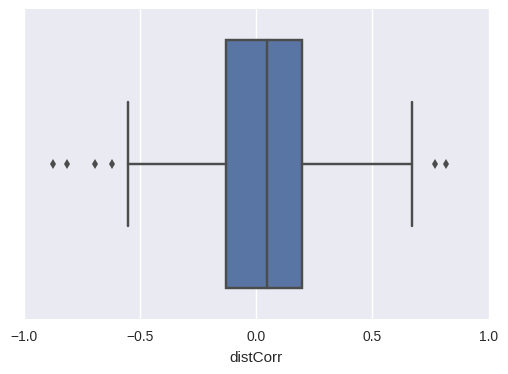

In [7]:
sns.boxplot(fullDF['distCorr'])

In [20]:
def feature_group(pair, features, dist):
    for feature in features:
        pair_df = pair[[feature,'saleprice', 'distance']]
        pair_df = pair_df[pair_df['distance'] < dist]
        pair_df.dropna(inplace=True)
        pair_df['saleprice'] = pd.to_numeric(pair_df['saleprice'], downcast='integer', errors='coerce')
        pair_df.dropna(inplace=True)
        pair_df = pair_df[pair_df['saleprice'] > 0]
        pair_group = pair_df.groupby(feature)
        
#         sigX, sigY, desc = [], [], []
        
        for fea in sorted(pair_df[feature].unique()):
            one_fea_df = pair_group.get_group(fea)
            if len(one_fea_df) < 5 or fea < 0:
                continue
            corr = pearsonr(one_fea_df['distance'], one_fea_df['saleprice'])
            plt.plot(one_fea_df['distance'], one_fea_df['saleprice'], linestyle='none', marker='o', label=fea)
            print 'corr(price, distance) on %d houses, %s = %s is %.4f, p = %.4f' %(len(one_fea_df), feature, fea, corr[0], corr[1])
#             if corr[1] < 0.05:
#                 sigX.append(one_fea_df['distance'])
#                 sigY.append(one_fea_df['saleprice'])
#                 desc.append(fea)

            plt.xlabel('distance')
            plt.ylabel('sale price')
            plt.title(feature + ' = ' + str(fea))
            plt.legend(loc='best')
            plt.show()
            
#         if len(sigX) > 0:
#             plt.figure()
#             for i in range(len(sigX)):
#                 plt.plot(sigX[i], sigY[i], linestyle='none', marker='o', label=desc[i])
#             plt.xlabel('distance')
#             plt.ylabel('sale price')
#             plt.legend(loc='best')
#             plt.title('group by ' + feature)
#             plt.show()

corr(price, distance) on 158 houses, numbed = 1 is -0.1294, p = 0.1052


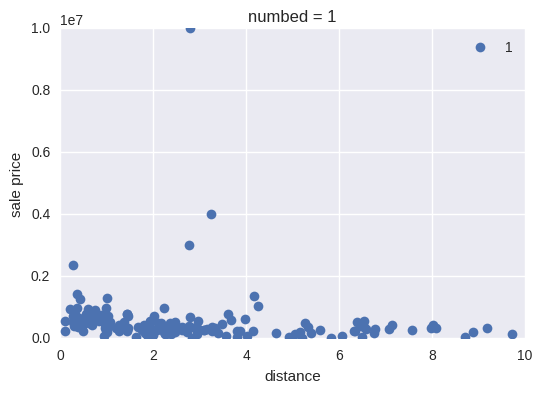

corr(price, distance) on 861 houses, numbed = 2 is -0.1947, p = 0.0000


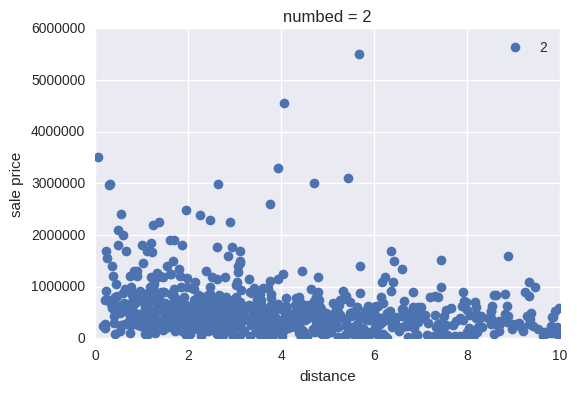

corr(price, distance) on 1827 houses, numbed = 3 is -0.0823, p = 0.0004


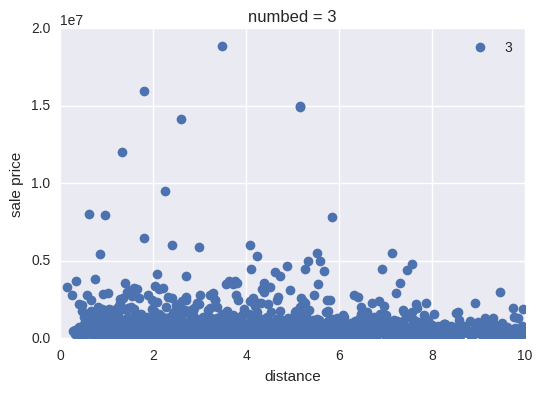

corr(price, distance) on 1466 houses, numbed = 4 is -0.0857, p = 0.0010


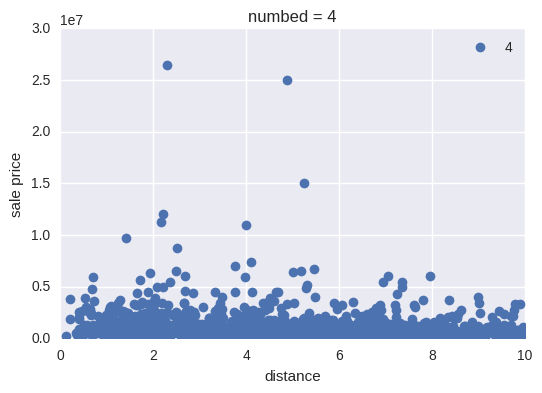

corr(price, distance) on 615 houses, numbed = 5 is -0.1292, p = 0.0013


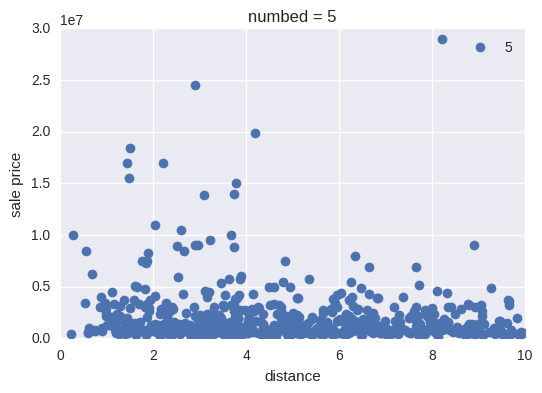

corr(price, distance) on 142 houses, numbed = 6 is -0.1876, p = 0.0253


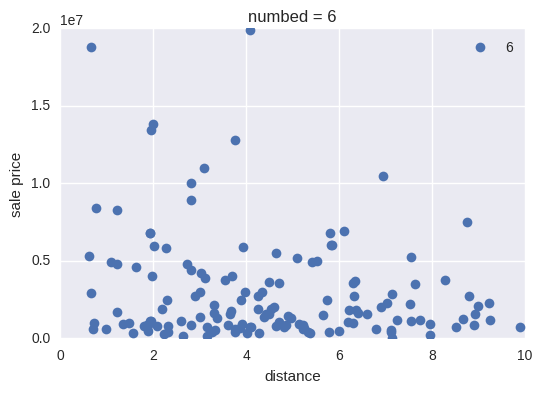

corr(price, distance) on 36 houses, numbed = 7 is 0.2522, p = 0.1379


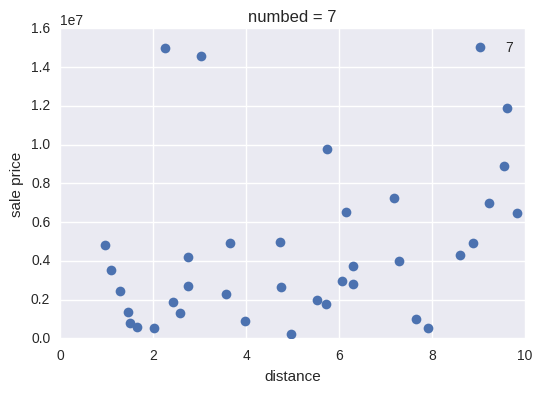

corr(price, distance) on 32 houses, numbed = 8 is -0.0019, p = 0.9919


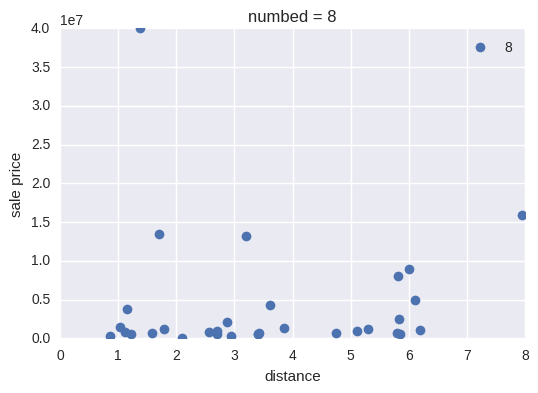

corr(price, distance) on 690 houses, num_bath_full = 1 is -0.0468, p = 0.2193


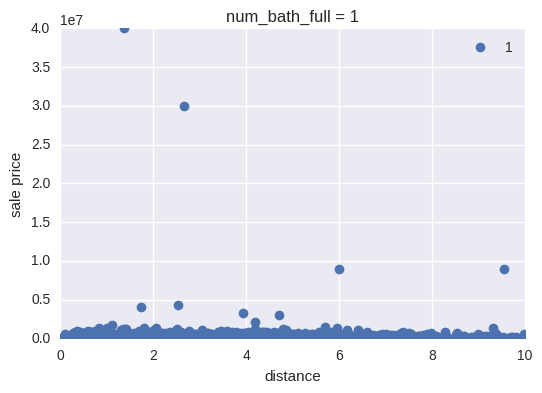

corr(price, distance) on 2202 houses, num_bath_full = 2 is -0.1022, p = 0.0000


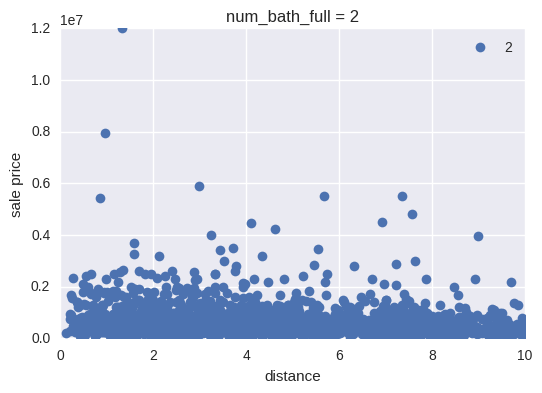

corr(price, distance) on 1344 houses, num_bath_full = 3 is -0.1451, p = 0.0000


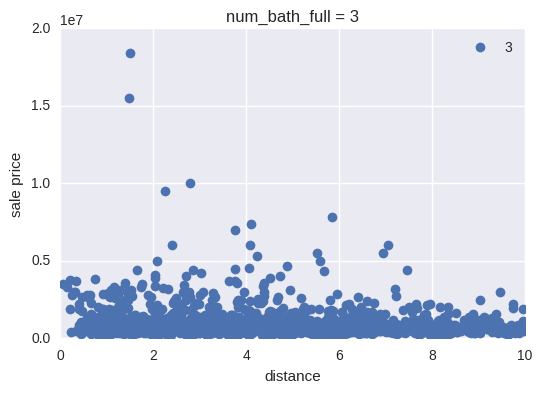

corr(price, distance) on 460 houses, num_bath_full = 4 is -0.0759, p = 0.1041


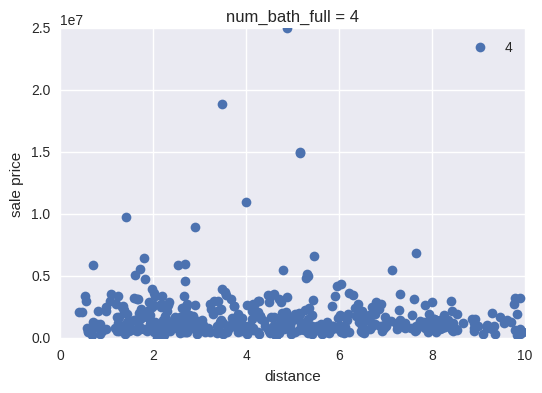

corr(price, distance) on 230 houses, num_bath_full = 5 is -0.2004, p = 0.0023


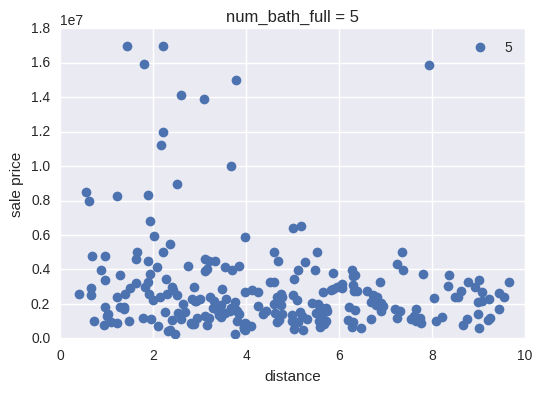

corr(price, distance) on 106 houses, num_bath_full = 6 is -0.0024, p = 0.9809


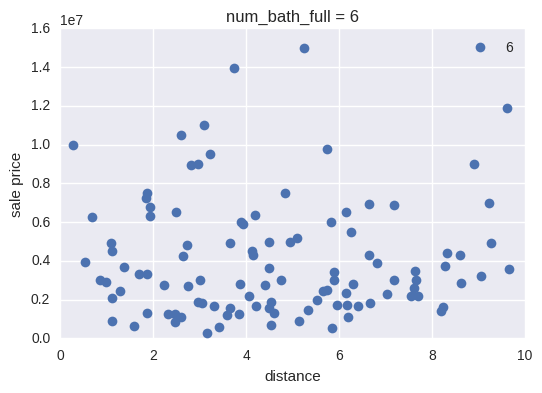

corr(price, distance) on 36 houses, num_bath_full = 7 is -0.1680, p = 0.3275


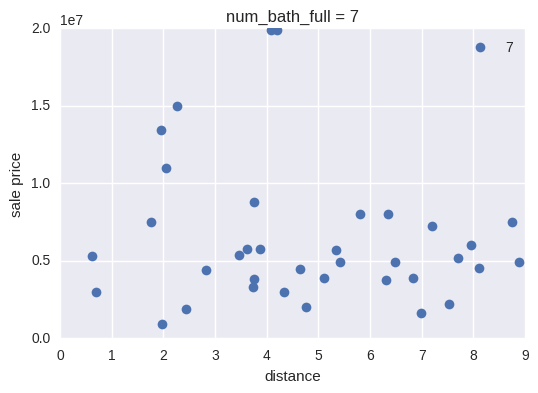

corr(price, distance) on 21 houses, num_bath_full = 8 is -0.3688, p = 0.1000


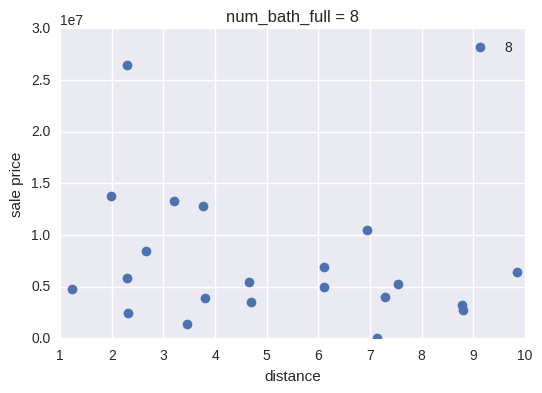

corr(price, distance) on 7 houses, num_bath_full = 9 is -0.0305, p = 0.9483


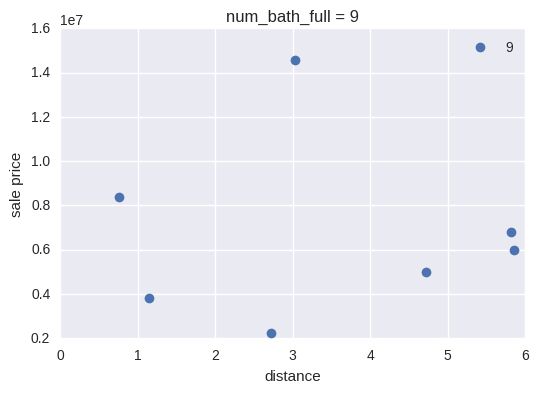

corr(price, distance) on 8 houses, num_bath_full = 10 is 0.1505, p = 0.7220


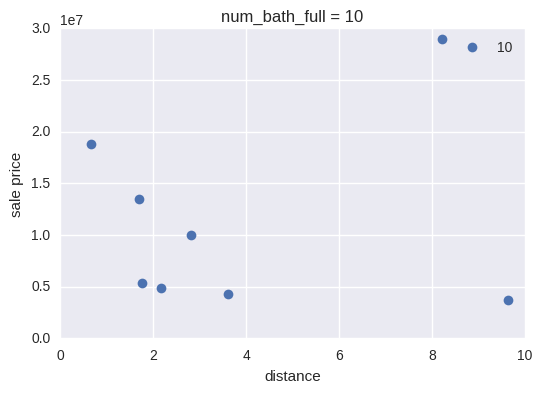

corr(price, distance) on 6 houses, num_bath_full = 17 is 0.6345, p = 0.1760


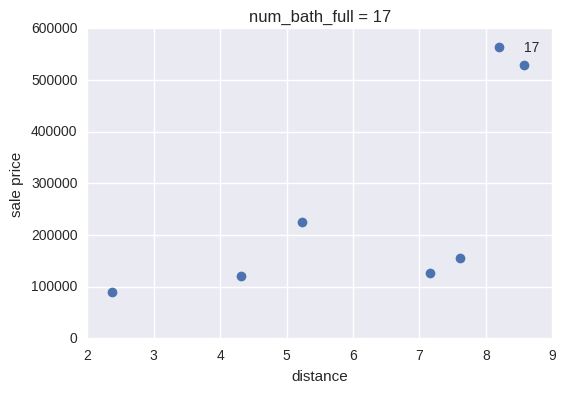

In [21]:
features = ['numbed','num_bath_full']
feature_group(state_pair, features, 10)

In [5]:
print sorted(state_pair['numbed'].unique())

[-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
